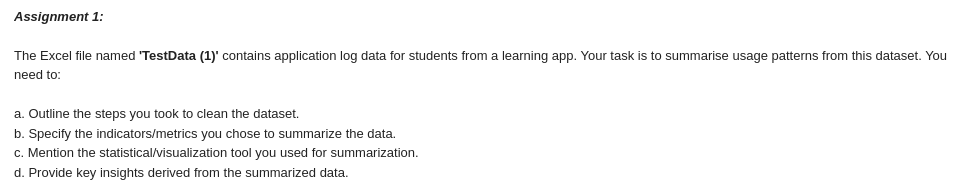

## Assumptions & Clarification:

1. Group ⊆ Village ⊆ Program
2. Level&ResoruceId: 'Level' is a progressive measure of the difficulty of resources under each subject. each content piece (or "resource") on the app is assigned a unique Resource ID
3. GroupID:  Individual learners organize themselves in mixed-age groups of 5-6 students and have the choice to access learning content together, or in a group session. Hence multiple (up to 5/6) studentIds can be mapped to a single groupId.
4. Assumption about the session tracking

# 1. Import Libraries

In [1]:
## importing the libraries:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
## get the data
data = pd.read_excel("https://raw.githubusercontent.com/aps0611/pratham_research/main/raw/test_data.xlsx")
data.head(5)

,programid,villageid,state,district,block,AutoId,SessionId,GroupId,ResourceId,DeviceId,Level,StartDateTime,EndDateTime,CreatedBy,DateAdded,resource_type
0,1,1338,RJ,Dausa,Bassi,50891232,004f9938-54ae-4630-bb7c-3c0e6797e21a,GRP17118,3046,3db616a9b90a8f09,0,2018-03-31 16:40:48,2018-03-31 16:44:33,NaN,2018-05-11 15:40:04.580000,VIDEO
1,1,1338,RJ,Dausa,Bassi,50891184,004f9938-54ae-4630-bb7c-3c0e6797e21a,GRP17118,3042,3db616a9b90a8f09,0,2018-03-31 16:40:48,2018-03-31 16:48:18,NaN,2018-05-11 15:40:04.580000,VIDEO
2,1,1365,RJ,Dausa,Bassi,50891295,00630537-3a99-4908-bd78-149d0b6b6128,GRP17591,SessionTracking,4fbb1b204bda36dc,0,2018-04-22 09:36:33,2018-04-22 09:49:01,NaN,2018-05-11 15:40:08.870000,NaN
3,1,1365,RJ,Dausa,Bassi,50891216,00630537-3a99-4908-bd78-149d0b6b6128,GRP17591,SessionTracking,4fbb1b204bda36dc,0,2018-04-22 09:36:33,2018-04-22 10:04:41,NaN,2018-05-11 15:40:08.870000,NaN
4,1,1365,RJ,Dausa,Bassi,50891141,00630537-3a99-4908-bd78-149d0b6b6128,GRP17591,SessionTracking,4fbb1b204bda36dc,0,2018-04-22 09:36:33,2018-04-22 10:05:40,NaN,2018-05-11 15:40:08.870000,NaN


# 2. Explore Dataset

In [3]:
## check the data shape

data.shape

## there are around 238223 rows and 16 columns

(238223, 16)

In [4]:
data.info()

## DateAdded, StartDateTime and EndDateTime are the datetime datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238223 entries, 0 to 238222
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   programid      238223 non-null  object
 1   villageid      238223 non-null  object
 2   state          238223 non-null  object
 3   district       238223 non-null  object
 4   block          238223 non-null  object
 5   AutoId         238223 non-null  object
 6   SessionId      238223 non-null  object
 7   GroupId        238223 non-null  object
 8   ResourceId     238219 non-null  object
 9   DeviceId       238223 non-null  object
 10  Level          238223 non-null  object
 11  StartDateTime  238223 non-null  object
 12  EndDateTime    238223 non-null  object
 13  CreatedBy      1 non-null       object
 14  DateAdded      238223 non-null  object
 15  resource_type  204700 non-null  object
dtypes: object(16)
memory usage: 29.1+ MB


# 3. Data Preprocessing

In [5]:
data.describe()

,programid,villageid,state,district,block,AutoId,SessionId,GroupId,ResourceId,DeviceId,Level,StartDateTime,EndDateTime,CreatedBy,DateAdded,resource_type
count,238223,238223,238223,238223,238223,238223,238223,238223,238219,238223,238223,238223,238223,1,238223,204700
unique,2,82,4,6,11,238223,17786,564,931,393,12,185185,214108,1,410,6
top,1,1331,RJ,Dausa,Bassi,50891232,83145c3b-e6f1-4636-a980-e977d53808d7,GRP16994,SessionTracking,17e63be238a7f831,1,2018-04-22 12:26:44,2018-05-10 16:22:47,CreatedBy,2018-05-11 15:40:04.190000,Game
freq,238222,16100,225146,224980,224980,1,403,6121,33342,6538,110788,54,18,1,4977,105481


In [6]:
data[data['programid']=='programid'] ## looks like the column name got repeated by mistake

## also we can drop the programid column since after deleting the row, there will only be one unique value

,programid,villageid,state,district,block,AutoId,SessionId,GroupId,ResourceId,DeviceId,Level,StartDateTime,EndDateTime,CreatedBy,DateAdded,resource_type
40285,programid,villageid,state,district,block,AutoId,SessionId,GroupId,ResourceId,DeviceId,Level,StartDateTime,EndDateTime,CreatedBy,DateAdded,resource_type


In [7]:
## locate the index first and then drop it
data.iloc[40285]

programid            programid
villageid            villageid
state                    state
district              district
block                    block
AutoId                  AutoId
SessionId            SessionId
GroupId                GroupId
ResourceId          ResourceId
DeviceId              DeviceId
Level                    Level
StartDateTime    StartDateTime
EndDateTime        EndDateTime
CreatedBy            CreatedBy
DateAdded            DateAdded
resource_type    resource_type
Name: 40285, dtype: object

In [8]:
data= data.drop(40285)

In [9]:
data.drop(columns=['CreatedBy','programid'], inplace=True)

In [10]:
## convert the three columns to datetime datatype

data['StartDateTime'] = pd.to_datetime(data['StartDateTime'])
data['EndDateTime'] = pd.to_datetime(data['EndDateTime'])
data['DateAdded'] = pd.to_datetime(data['DateAdded'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238222 entries, 0 to 238222
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   villageid      238222 non-null  object        
 1   state          238222 non-null  object        
 2   district       238222 non-null  object        
 3   block          238222 non-null  object        
 4   AutoId         238222 non-null  object        
 5   SessionId      238222 non-null  object        
 6   GroupId        238222 non-null  object        
 7   ResourceId     238218 non-null  object        
 8   DeviceId       238222 non-null  object        
 9   Level          238222 non-null  object        
 10  StartDateTime  238222 non-null  datetime64[ns]
 11  EndDateTime    238222 non-null  datetime64[ns]
 12  DateAdded      238222 non-null  datetime64[ns]
 13  resource_type  204699 non-null  object        
dtypes: datetime64[ns](3), object(11)
memory usage: 27.3+

In [12]:
cols = ['villageid', 'state', 'district','block','Level','resource_type','ResourceId','DateAdded']
for col_ in cols:
  print(data[col_].value_counts())

1331    16100
1338    15141
1316    14350
1349    10539
1337     9874
        ...  
714         3
317         1
395         1
431         1
982         1
Name: villageid, Length: 81, dtype: int64
RJ    225146
UP     11914
MH      1162
Name: state, dtype: int64
Dausa         224980
Sitapur         7236
Unnao           4678
Aurangabad      1162
Ajmer            166
Name: district, dtype: int64
Bassi        224980
Asoha          4042
Khairabad      2178
Sidhauli       2128
Sakaran        1491
Biswan         1439
Gangapur        708
Hilauli         636
Khultabad       454
Pisangan        166
Name: block, dtype: int64
1      110788
0      103815
2       15478
3        6096
99        563
6         478
5         362
14        319
4         260
990        40
991        23
Name: Level, dtype: int64
Game             105481
VIDEO             60739
INTERNAL LINK     37802
Aaj Ka Sawaal       604
PDF                  73
Name: resource_type, dtype: int64
SessionTracking    33342
3520               2

In [13]:
data.select_dtypes(include=['object']).describe()

,villageid,state,district,block,AutoId,SessionId,GroupId,ResourceId,DeviceId,Level,resource_type
count,238222,238222,238222,238222,238222,238222,238222,238218,238222,238222,204699
unique,81,3,5,10,238222,17785,563,930,392,11,5
top,1331,RJ,Dausa,Bassi,50891232,83145c3b-e6f1-4636-a980-e977d53808d7,GRP16994,SessionTracking,17e63be238a7f831,1,Game
freq,16100,225146,224980,224980,1,403,6121,33342,6538,110788,105481


# 4. Basic Description of the dataset:

1. There is one unique program
2. There are 81 unique villages - 1331> 1338 > 1316
3. Data pertain to 3 states - RJ > UP > MH
4. Covers 5 districts in total- Dausa > Sitapur > Unnao > Aurangabad > Ajmer
5. Covers 10 Blocks- Bassi > Asoa > Khairabad
6. AutoId Seems like a unique identifier
7. ResourceId- max session_tracking. Not specific to any resourceid
8. Level: 11 levels
9. StartDateTime and EndDateTime: like session start and end time
10. CreatedBy column: redundant for this analysis
11. DateAdded: redundant for analysis
12. ResourceType: There are 5 unique resource types- Game > Video > Internal link > Aaj Ka Sawal > Pdf

In [14]:
data.select_dtypes(include=['datetime64[ns]']).describe()

<ipython-input-14-9a8b64a37c79>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.select_dtypes(include=['datetime64[ns]']).describe()
<ipython-input-14-9a8b64a37c79>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.select_dtypes(include=['datetime64[ns]']).describe()
<ipython-input-14-9a8b64a37c79>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.select_dtypes(include=['dat

,StartDateTime,EndDateTime,DateAdded
count,238222,238222,238222
unique,185184,214107,409
top,2018-04-22 12:26:44,2018-05-10 16:22:47,2018-05-11 15:40:04.190000
freq,54,18,4977
first,2010-01-01 01:46:33,2010-01-01 01:46:53,2018-05-10 23:00:18.420000
last,2030-04-17 20:38:51,2030-04-17 20:50:47,2018-05-11 15:40:15.690000


In [15]:
## lets see how the startdates and enddates are for different states
data[data['state']=='RJ'].StartDateTime.min()

## RJ has outliers in dates
## RJ UP has dates from 2010


Timestamp('2010-01-01 01:46:33')

# 5. Data Cleaning and Preprocessing (2)

In [16]:
data.isna().sum()

villageid            0
state                0
district             0
block                0
AutoId               0
SessionId            0
GroupId              0
ResourceId           4
DeviceId             0
Level                0
StartDateTime        0
EndDateTime          0
DateAdded            0
resource_type    33523
dtype: int64

In [17]:
(33523/238222)*100

## Lets not delete the resource_type rows
## lets drop CreatedBy
## lets drop missing ResouceId rows

14.072167977768634

In [18]:
data[data.resource_type.isna()].ResourceId.value_counts()

SessionTracking         33342
6509                       52
6508                       40
6510                       36
Assessment-Practice        23
Assessment-CRLID-516        4
6122                        2
6029                        2
6010                        2
6136                        2
6022                        2
6004                        1
6001                        1
6035                        1
6124                        1
6019                        1
6011                        1
6024                        1
6023                        1
6031                        1
6025                        1
6007                        1
6036                        1
Name: ResourceId, dtype: int64

In [19]:
## drop the rows where the resourceid is null
data.dropna(subset=['ResourceId'], inplace=True)

In [20]:
data.Level.value_counts()

1      110788
0      103811
2       15478
3        6096
99        563
6         478
5         362
14        319
4         260
990        40
991        23
Name: Level, dtype: int64

In [21]:
data[data.Level == 14].resource_type.value_counts()

# 99,990,991 these levels are related to AAJ KA SAWAL- Need to check!!

Game             230
INTERNAL LINK     89
Name: resource_type, dtype: int64

In [22]:
## calculate the duration of session:

data['SessionDuration'] = data['EndDateTime'] - data['StartDateTime']
data.head(3)

,villageid,state,district,block,AutoId,SessionId,GroupId,ResourceId,DeviceId,Level,StartDateTime,EndDateTime,DateAdded,resource_type,SessionDuration
0,1338,RJ,Dausa,Bassi,50891232,004f9938-54ae-4630-bb7c-3c0e6797e21a,GRP17118,3046,3db616a9b90a8f09,0,2018-03-31 16:40:48,2018-03-31 16:44:33,2018-05-11 15:40:04.580,VIDEO,0 days 00:03:45
1,1338,RJ,Dausa,Bassi,50891184,004f9938-54ae-4630-bb7c-3c0e6797e21a,GRP17118,3042,3db616a9b90a8f09,0,2018-03-31 16:40:48,2018-03-31 16:48:18,2018-05-11 15:40:04.580,VIDEO,0 days 00:07:30
2,1365,RJ,Dausa,Bassi,50891295,00630537-3a99-4908-bd78-149d0b6b6128,GRP17591,SessionTracking,4fbb1b204bda36dc,0,2018-04-22 09:36:33,2018-04-22 09:49:01,2018-05-11 15:40:08.870,NaN,0 days 00:12:28


In [23]:
session_duration_stats = data.groupby('SessionId')['SessionDuration'].mean()
session_duration_stats

SessionId
00047b77-f390-4bed-beb7-e22df15b48c6             0 days 00:07:34
00053a54-c710-460b-aad3-b105b1e3eb42   0 days 00:00:30.275862068
0008b7f7-7ba0-43fe-a788-1b820e67bd01      0 days 00:00:39.200000
000a25e4-6454-40af-bf67-c365661e3fcf      0 days 00:03:08.125000
000a4c6b-f357-423b-803c-e47ab9fad0b9             0 days 00:00:08
                                                  ...           
ffb1c4d6-d877-479d-99e0-e86eeed7cdec             0 days 00:00:37
ffb4f089-8a68-40aa-82e6-a4574ff5db5b   0 days 00:01:46.233333333
ffc895ab-d03d-4df7-af89-167810d22464             0 days 00:14:08
ffdcef88-646e-402f-8cb0-e91d40f39ac1             0 days 00:02:26
fff947c6-b584-4d8b-bb6e-2df9990008c4   0 days 00:49:30.333333333
Name: SessionDuration, Length: 17785, dtype: timedelta64[ns]

1. The user engaged in multiple interactions or events within the same session
2. The user had accessed multiple resourceId within the same session

In [24]:
data['startYear'] = pd.to_datetime(data['StartDateTime']).dt.year
data['endYear'] = pd.to_datetime(data['EndDateTime']).dt.year

{'whiskers': [<matplotlib.lines.Line2D at 0x7bca4f148550>,
 'caps': [<matplotlib.lines.Line2D at 0x7bca4f148eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bca4f131b70>],
 'medians': [<matplotlib.lines.Line2D at 0x7bca4f149a50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bca4f149de0>],
 'means': []}

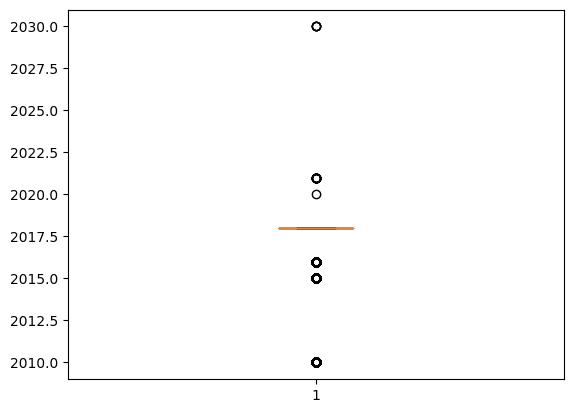

In [25]:
plt.boxplot(data['startYear'])

In [26]:
data[data['startYear']==2030]

,villageid,state,district,block,AutoId,SessionId,GroupId,ResourceId,DeviceId,Level,StartDateTime,EndDateTime,DateAdded,resource_type,SessionDuration,startYear,endYear
118063,1331,RJ,Dausa,Bassi,50942876,3d0d3aa7-cb87-4650-93f8-f4cbc450d959,GRP16943,1118,fbbb35266c1c1834,1,2030-04-17 20:38:32,2030-04-17 20:38:48,2018-05-10 23:00:20.303,Game,0 days 00:00:16,2030,2030
118137,1331,RJ,Dausa,Bassi,50971395,3d0d3aa7-cb87-4650-93f8-f4cbc450d959,GRP16943,1118,fbbb35266c1c1834,1,2030-04-17 20:38:51,2030-04-17 20:39:21,2018-05-10 23:00:20.303,Game,0 days 00:00:30,2030,2030
118167,1331,RJ,Dausa,Bassi,50975157,3d0d3aa7-cb87-4650-93f8-f4cbc450d959,GRP16943,1118,fbbb35266c1c1834,1,2030-04-17 20:38:19,2030-04-17 20:38:29,2018-05-10 23:00:20.303,Game,0 days 00:00:10,2030,2030
118278,1331,RJ,Dausa,Bassi,50978666,3d0d3aa7-cb87-4650-93f8-f4cbc450d959,GRP16943,SessionTracking,fbbb35266c1c1834,0,2030-04-17 20:36:32,2030-04-17 20:50:47,2018-05-10 23:00:20.303,NaN,0 days 00:14:15,2030,2030


In [27]:
data[data['SessionId']=='3d0d3aa7-cb87-4650-93f8-f4cbc450d959']

,villageid,state,district,block,AutoId,SessionId,GroupId,ResourceId,DeviceId,Level,StartDateTime,EndDateTime,DateAdded,resource_type,SessionDuration,startYear,endYear
118063,1331,RJ,Dausa,Bassi,50942876,3d0d3aa7-cb87-4650-93f8-f4cbc450d959,GRP16943,1118,fbbb35266c1c1834,1,2030-04-17 20:38:32,2030-04-17 20:38:48,2018-05-10 23:00:20.303,Game,0 days 00:00:16,2030,2030
118137,1331,RJ,Dausa,Bassi,50971395,3d0d3aa7-cb87-4650-93f8-f4cbc450d959,GRP16943,1118,fbbb35266c1c1834,1,2030-04-17 20:38:51,2030-04-17 20:39:21,2018-05-10 23:00:20.303,Game,0 days 00:00:30,2030,2030
118167,1331,RJ,Dausa,Bassi,50975157,3d0d3aa7-cb87-4650-93f8-f4cbc450d959,GRP16943,1118,fbbb35266c1c1834,1,2030-04-17 20:38:19,2030-04-17 20:38:29,2018-05-10 23:00:20.303,Game,0 days 00:00:10,2030,2030
118278,1331,RJ,Dausa,Bassi,50978666,3d0d3aa7-cb87-4650-93f8-f4cbc450d959,GRP16943,SessionTracking,fbbb35266c1c1834,0,2030-04-17 20:36:32,2030-04-17 20:50:47,2018-05-10 23:00:20.303,NaN,0 days 00:14:15,2030,2030


Looks like clock synchronization issue. lets drop these rows

In [28]:
data = data[data['startYear'] != 2030]

{'whiskers': [<matplotlib.lines.Line2D at 0x7bca4f1b1600>,
 'caps': [<matplotlib.lines.Line2D at 0x7bca4f1b26b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bca4f1b0eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7bca4f1b31f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bca4f1b3580>],
 'means': []}

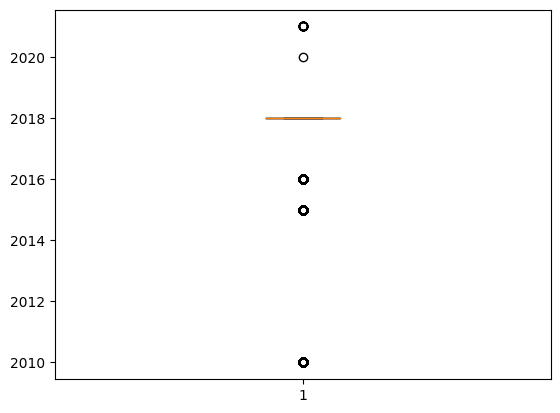

In [29]:
plt.boxplot(data['startYear'])

In [30]:
data.head(2)

,villageid,state,district,block,AutoId,SessionId,GroupId,ResourceId,DeviceId,Level,StartDateTime,EndDateTime,DateAdded,resource_type,SessionDuration,startYear,endYear
0,1338,RJ,Dausa,Bassi,50891232,004f9938-54ae-4630-bb7c-3c0e6797e21a,GRP17118,3046,3db616a9b90a8f09,0,2018-03-31 16:40:48,2018-03-31 16:44:33,2018-05-11 15:40:04.580,VIDEO,0 days 00:03:45,2018,2018
1,1338,RJ,Dausa,Bassi,50891184,004f9938-54ae-4630-bb7c-3c0e6797e21a,GRP17118,3042,3db616a9b90a8f09,0,2018-03-31 16:40:48,2018-03-31 16:48:18,2018-05-11 15:40:04.580,VIDEO,0 days 00:07:30,2018,2018


In [31]:
# lets create the time duration in seconds

data['sessionDurationSeconds'] = data['SessionDuration'].dt.total_seconds()
data.head(3)

,villageid,state,district,block,AutoId,SessionId,GroupId,ResourceId,DeviceId,Level,StartDateTime,EndDateTime,DateAdded,resource_type,SessionDuration,startYear,endYear,sessionDurationSeconds
0,1338,RJ,Dausa,Bassi,50891232,004f9938-54ae-4630-bb7c-3c0e6797e21a,GRP17118,3046,3db616a9b90a8f09,0,2018-03-31 16:40:48,2018-03-31 16:44:33,2018-05-11 15:40:04.580,VIDEO,0 days 00:03:45,2018,2018,225.0
1,1338,RJ,Dausa,Bassi,50891184,004f9938-54ae-4630-bb7c-3c0e6797e21a,GRP17118,3042,3db616a9b90a8f09,0,2018-03-31 16:40:48,2018-03-31 16:48:18,2018-05-11 15:40:04.580,VIDEO,0 days 00:07:30,2018,2018,450.0
2,1365,RJ,Dausa,Bassi,50891295,00630537-3a99-4908-bd78-149d0b6b6128,GRP17591,SessionTracking,4fbb1b204bda36dc,0,2018-04-22 09:36:33,2018-04-22 09:49:01,2018-05-11 15:40:08.870,NaN,0 days 00:12:28,2018,2018,748.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7bca4f00a200>,
 'caps': [<matplotlib.lines.Line2D at 0x7bca4f00aec0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bca4f009a20>],
 'medians': [<matplotlib.lines.Line2D at 0x7bca4f00bd00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bca4f1d0370>],
 'means': []}

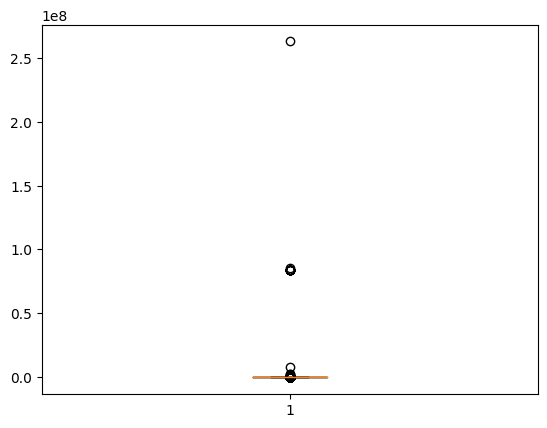

In [32]:
plt.boxplot(data.sessionDurationSeconds)

Looks like some some users did not log out or system failed to close the session? Unusual User behaviour

In [33]:
## Lets find the quantile range
Q1 = data['sessionDurationSeconds'].quantile(0.25)
Q3 = data['sessionDurationSeconds'].quantile(0.95)
Q1,Q3

(5.0, 1313.0)

In [34]:
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound, upper_bound

(-1957.0, 3275.0)

Lets assume that one does not enage in a session for more than hour then:

In [35]:
data[(data['sessionDurationSeconds'] > 3600)].ResourceId.value_counts()

SessionTracking    1983
3077                  2
3490                  2
3222                  1
1555                  1
372                   1
1550                  1
1568                  1
310                   1
3116                  1
1356                  1
3067                  1
3075                  1
3086                  1
3074                  1
1538                  1
1547                  1
1566                  1
1528                  1
3521                  1
3196                  1
3602                  1
3497                  1
5536                  1
6108                  1
5530                  1
1569                  1
Name: ResourceId, dtype: int64

In [36]:
id_ = [        3077,              3490,
                    3222,              1555,               372,
                    1550,              1568,               310,
                    3116,              1356,              3067,
                    3075,              3086,              3074,
                    1538,              1547,              1566,
                    1528,              3521,              3196,
                    3602,              3497,              5536,
                    6108,              5530,              1569]

In [37]:
data[(data['sessionDurationSeconds'] > 3600) & data['ResourceId'].isin(id_)]

,villageid,state,district,block,AutoId,SessionId,GroupId,ResourceId,DeviceId,Level,StartDateTime,EndDateTime,DateAdded,resource_type,SessionDuration,startYear,endYear,sessionDurationSeconds
7741,905,UP,Unnao,Asoha,51233608,30ea1cd1-1a1a-47c3-b187-6c94ea1872f1,GRP14097,1538,b500a8e72aea433a,0,2018-05-10 13:35:19,2018-05-10 14:39:46,2018-05-11 15:40:11.280,VIDEO,0 days 01:04:27,2018,2018,3867.0
25137,1315,RJ,Dausa,Bassi,51015830,9635f8de-db01-40af-af26-3e52ec449542,GRP16581,5530,4694ec6359fb9f87,0,2018-04-05 14:32:15,2018-04-05 15:50:24,2018-05-11 15:40:05.243,VIDEO,0 days 01:18:09,2018,2018,4689.0
27067,855,UP,Unnao,Asoha,51120892,a27fb98d-c171-4d38-a4a5-6ffa784597ba,GRP13681,6108,1bffb69a28ce1092,991,2020-08-18 20:08:19,2020-11-16 17:05:22,2018-05-11 15:40:13.580,Aaj Ka Sawaal,89 days 20:57:03,2020,2020,7765023.0
31514,869,UP,Unnao,Asoha,51161983,bffd31f7-0939-4b86-a784-3df6fdc4da72,GRP13801,5536,3e5268f68ce2d795,0,2018-05-10 13:50:59,2018-05-10 15:06:44,2018-05-11 15:40:12.470,VIDEO,0 days 01:15:45,2018,2018,4545.0
33940,457,UP,Sitapur,Sakaran,51176544,d2cbea25-44c1-4387-baf8-f4ce547a7d8a,GRP9495,3497,e93a05fde610ed85,0,2018-05-10 16:52:11,2018-05-10 18:26:45,2018-05-11 15:40:03.313,VIDEO,0 days 01:34:34,2018,2018,5674.0
40423,1324,RJ,Dausa,Bassi,51075683,00173aa9-1220-421d-910e-aba6c3e6a1ae,GRP16728,3602,316c8ee9cf0ee57b,1,2018-04-26 09:32:44,2018-04-26 15:33:01,2018-05-10 23:00:28.993,VIDEO,0 days 06:00:17,2018,2018,21617.0
102300,1357,RJ,Dausa,Bassi,50936064,30ccfde8-22ad-42c2-8a9c-93c860e43ec4,"GRP17490,",3196,6PKZQWPJFEBMSOAE,0,2018-05-08 14:23:44,2018-05-08 15:45:30,2018-05-10 23:01:09.450,VIDEO,0 days 01:21:46,2018,2018,4906.0
102728,1339,RJ,Dausa,Bassi,50939997,31502862-27ce-4085-ab6c-389bac638e8e,GRP17140,3521,560eb04319b6e8c3,1,2018-04-13 08:42:57,2018-04-13 14:56:57,2018-05-10 23:01:02.730,Game,0 days 06:14:00,2018,2018,22440.0
104510,1333,RJ,Dausa,Bassi,50936987,32f5f252-1693-4e9b-bb1b-ad6a4e040c69,GRP16994,3490,9df40538121a62c7,0,2018-04-30 09:07:57,2018-04-30 11:27:52,2018-05-10 23:00:57.340,Game,0 days 02:19:55,2018,2018,8395.0
114683,1331,RJ,Dausa,Bassi,50978814,3b0812ac-fd73-4742-9fae-040b66541d04,GRP16965,1528,47dd49c53e0a4a3e,0,2018-04-24 09:03:56,2018-04-24 10:05:05,2018-05-10 23:00:37.413,VIDEO,0 days 01:01:09,2018,2018,3669.0


In [38]:
## upper limit on session duration to 4 hour and lets not take the sessionDuration of 0 seconds
filtered_data = data[(data['sessionDurationSeconds'] <= 14400)&((data['sessionDurationSeconds'] > 0))]
filtered_data.head(3),filtered_data.shape

(  villageid state district  block    AutoId  \
 0      1338    RJ    Dausa  Bassi  50891232   
 1      1338    RJ    Dausa  Bassi  50891184   
 2      1365    RJ    Dausa  Bassi  50891295   
 
                               SessionId   GroupId       ResourceId  \
 0  004f9938-54ae-4630-bb7c-3c0e6797e21a  GRP17118             3046   
 1  004f9938-54ae-4630-bb7c-3c0e6797e21a  GRP17118             3042   
 2  00630537-3a99-4908-bd78-149d0b6b6128  GRP17591  SessionTracking   
 
            DeviceId Level       StartDateTime         EndDateTime  \
 0  3db616a9b90a8f09     0 2018-03-31 16:40:48 2018-03-31 16:44:33   
 1  3db616a9b90a8f09     0 2018-03-31 16:40:48 2018-03-31 16:48:18   
 2  4fbb1b204bda36dc     0 2018-04-22 09:36:33 2018-04-22 09:49:01   
 
                 DateAdded resource_type SessionDuration  startYear  endYear  \
 0 2018-05-11 15:40:04.580         VIDEO 0 days 00:03:45       2018     2018   
 1 2018-05-11 15:40:04.580         VIDEO 0 days 00:07:30       2018     2018  

{'whiskers': [<matplotlib.lines.Line2D at 0x7bca4f0676a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7bca4f070340>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bca4f066f50>],
 'medians': [<matplotlib.lines.Line2D at 0x7bca4f071150>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bca4f0718a0>],
 'means': []}

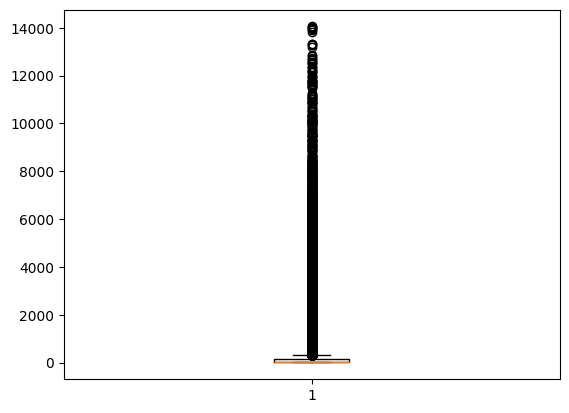

In [39]:
plt.boxplot(filtered_data.sessionDurationSeconds)

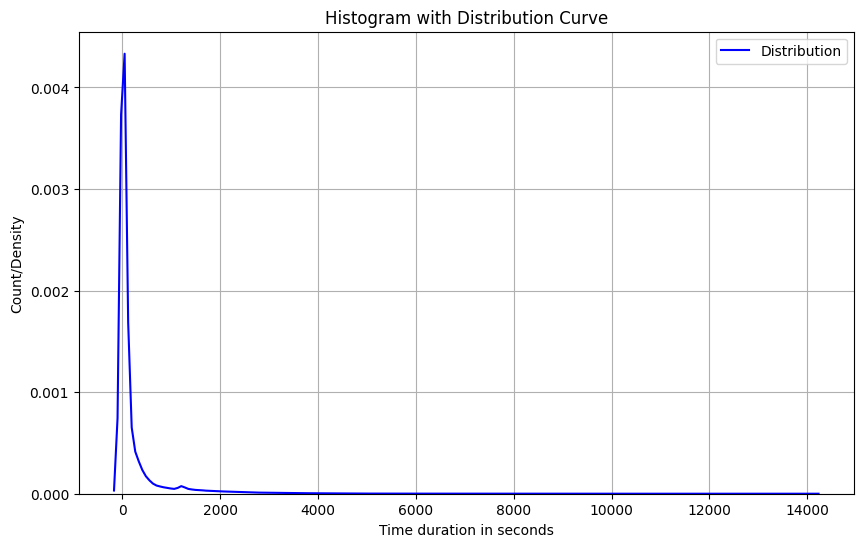

In [40]:
# Create subplots with shared axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histogram
# sns.histplot(filtered_data['sessionDurationSeconds'], bins=30, color='lightblue', edgecolor='black', alpha=0.7, ax=ax, label='Histogram')

# Overlay distribution curve (KDE plot)
sns.kdeplot(filtered_data['sessionDurationSeconds'], color='blue', ax=ax, label='Distribution',common_norm=True)

# Set labels and title
ax.set_title('Histogram with Distribution Curve')
ax.set_xlabel('Time duration in seconds')
ax.set_ylabel('Count/Density')

# Show legend
ax.legend()

# Show plot
plt.grid(True)
plt.show()


In [41]:
data[data['sessionDurationSeconds'] == 0].ResourceId.value_counts()

3520    5452
3532     326
3540     165
3524     100
5502      84
        ... 
1531       1
3539       1
5537       1
3203       1
314        1
Name: ResourceId, Length: 108, dtype: int64

users navigate between different sections or pages within the application without engaging in substantive activities for these resourceId

In [42]:
data[data.sessionDurationSeconds == 0].shape

(6746, 18)

In [43]:
data[data.sessionDurationSeconds == 0].resource_type.value_counts()

Game             4692
INTERNAL LINK    1931
VIDEO              92
Name: resource_type, dtype: int64

In [44]:
data.shape

(238214, 18)

In [45]:
session_time_stats = filtered_data.groupby('SessionId').agg({'StartDateTime': 'min', 'EndDateTime': 'max'})
session_time_stats['TotalDuration'] = session_time_stats['EndDateTime'] - session_time_stats['StartDateTime']
session_time_stats

,StartDateTime,EndDateTime,TotalDuration
SessionId,,,
00047b77-f390-4bed-beb7-e22df15b48c6,2018-05-04 16:17:46,2018-05-04 17:03:00,0 days 00:45:14
00053a54-c710-460b-aad3-b105b1e3eb42,2018-04-30 07:29:20,2018-04-30 07:39:50,0 days 00:10:30
0008b7f7-7ba0-43fe-a788-1b820e67bd01,2018-04-21 21:47:31,2018-04-21 22:05:49,0 days 00:18:18
000a25e4-6454-40af-bf67-c365661e3fcf,2018-04-01 12:17:56,2018-04-01 12:26:59,0 days 00:09:03
000a4c6b-f357-423b-803c-e47ab9fad0b9,2018-04-01 13:22:01,2018-04-01 13:22:16,0 days 00:00:15
...,...,...,...
ffb1c4d6-d877-479d-99e0-e86eeed7cdec,2018-04-01 07:57:31,2018-04-01 07:58:08,0 days 00:00:37
ffb4f089-8a68-40aa-82e6-a4574ff5db5b,2018-05-03 13:52:11,2018-05-03 14:22:45,0 days 00:30:34
ffc895ab-d03d-4df7-af89-167810d22464,2018-04-03 20:31:30,2018-04-03 20:45:38,0 days 00:14:08


In [46]:
session_time_stats.describe()

,TotalDuration
count,17771
mean,0 days 00:20:58.723707163
std,0 days 04:56:07.040779765
min,0 days 00:00:01
25%,0 days 00:02:18
50%,0 days 00:10:58
75%,0 days 00:24:58
max,27 days 01:00:57


{'whiskers': [<matplotlib.lines.Line2D at 0x7bca4ef11d20>,
 'caps': [<matplotlib.lines.Line2D at 0x7bca4ef128f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bca4ef11930>],
 'medians': [<matplotlib.lines.Line2D at 0x7bca4ef133a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bca4ef139d0>],
 'means': []}

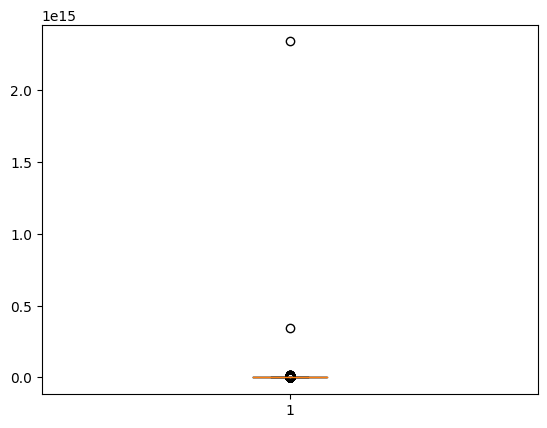

In [47]:
plt.boxplot(session_time_stats['TotalDuration'])

Since the data is highly volatile it is a good idea to look at the 50%~ most session duration are around 11 minutes and range of 2min to 25 minutes

In [48]:
session_time_stats[session_time_stats['TotalDuration']> '1 days 00:00:00']

,StartDateTime,EndDateTime,TotalDuration
SessionId,,,
4dfc4974-3282-4d95-9146-3d599c0ff13b,2018-04-03 16:06:27,2018-04-30 17:07:24,27 days 01:00:57
6c1ed417-4d3e-40ad-849f-fdc406305241,2018-05-05 22:42:48,2018-05-09 22:51:40,4 days 00:08:52


In [49]:
filtered_data.describe()

,SessionDuration,startYear,endYear,sessionDurationSeconds
count,231247,231247.000000,231247.000000,231247.000000
mean,0 days 00:03:54.906653924,2017.800880,2017.800880,234.906654
std,0 days 00:11:15.778254774,1.051335,1.051335,675.778255
min,0 days 00:00:01,2010.000000,2010.000000,1.000000
25%,0 days 00:00:06,2018.000000,2018.000000,6.000000
50%,0 days 00:00:17,2018.000000,2018.000000,17.000000
75%,0 days 00:02:07,2018.000000,2018.000000,127.000000
max,0 days 03:54:18,2021.000000,2021.000000,14058.000000


In [50]:
filtered_data2 = filtered_data[filtered_data['ResourceId'] != 'SessionTracking']
filtered_data2.shape

(198125, 18)

In [51]:
filtered_data2.describe()

,SessionDuration,startYear,endYear,sessionDurationSeconds
count,198125,198125.000000,198125.000000,198125.000000
mean,0 days 00:01:01.788431545,2017.809762,2017.809762,61.788432
std,0 days 00:02:21.177637567,1.020214,1.020214,141.177638
min,0 days 00:00:01,2010.000000,2010.000000,1.000000
25%,0 days 00:00:05,2018.000000,2018.000000,5.000000
50%,0 days 00:00:14,2018.000000,2018.000000,14.000000
75%,0 days 00:00:53,2018.000000,2018.000000,53.000000
max,0 days 02:19:55,2021.000000,2021.000000,8395.000000


In [52]:
filtered_data2[filtered_data2.DeviceId == '3db616a9b90a8f09'].GroupId.value_counts()

GRP17118    2414
Name: GroupId, dtype: int64

In [53]:
group_device_counts = data.groupby('GroupId')['DeviceId'].nunique()

In [54]:
filtered_data2.isna().sum()

villageid                   0
state                       0
district                    0
block                       0
AutoId                      0
SessionId                   0
GroupId                     0
ResourceId                  0
DeviceId                    0
Level                       0
StartDateTime               0
EndDateTime                 0
DateAdded                   0
resource_type             149
SessionDuration             0
startYear                   0
endYear                     0
sessionDurationSeconds      0
dtype: int64

In [55]:
filtered_data.isna().sum()

villageid                     0
state                         0
district                      0
block                         0
AutoId                        0
SessionId                     0
GroupId                       0
ResourceId                    0
DeviceId                      0
Level                         0
StartDateTime                 0
EndDateTime                   0
DateAdded                     0
resource_type             33271
SessionDuration               0
startYear                     0
endYear                       0
sessionDurationSeconds        0
dtype: int64

In [56]:
filtered_data.shape

(231247, 18)

# 6. Lets generate some insights

## 1. The most popular resource type among the students

In [57]:
## this also includes the session tracking
resource_type_counts = filtered_data['resource_type'].value_counts()
resource_type_counts

Game             100784
VIDEO             60645
INTERNAL LINK     35871
Aaj Ka Sawaal       603
PDF                  73
Name: resource_type, dtype: int64

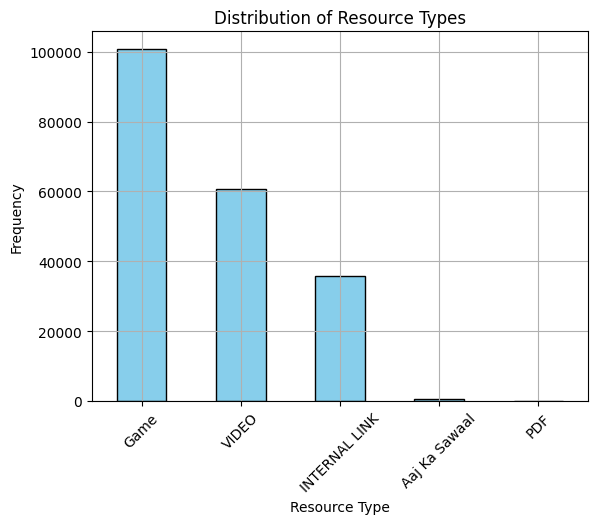

In [58]:
resource_type_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Resource Types')
plt.xlabel('Resource Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## 2. peak usage times based on session start and end times




In [59]:
filtered_data['startHour'] = filtered_data['StartDateTime'].dt.hour
filtered_data['endHour'] = filtered_data['EndDateTime'].dt.hour

<ipython-input-59-e77d6a1a3700>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['startHour'] = filtered_data['StartDateTime'].dt.hour
<ipython-input-59-e77d6a1a3700>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['endHour'] = filtered_data['EndDateTime'].dt.hour


In [60]:
filtered_data.head(3)

,villageid,state,district,block,AutoId,SessionId,GroupId,ResourceId,DeviceId,Level,StartDateTime,EndDateTime,DateAdded,resource_type,SessionDuration,startYear,endYear,sessionDurationSeconds,startHour,endHour
0,1338,RJ,Dausa,Bassi,50891232,004f9938-54ae-4630-bb7c-3c0e6797e21a,GRP17118,3046,3db616a9b90a8f09,0,2018-03-31 16:40:48,2018-03-31 16:44:33,2018-05-11 15:40:04.580,VIDEO,0 days 00:03:45,2018,2018,225.0,16,16
1,1338,RJ,Dausa,Bassi,50891184,004f9938-54ae-4630-bb7c-3c0e6797e21a,GRP17118,3042,3db616a9b90a8f09,0,2018-03-31 16:40:48,2018-03-31 16:48:18,2018-05-11 15:40:04.580,VIDEO,0 days 00:07:30,2018,2018,450.0,16,16
2,1365,RJ,Dausa,Bassi,50891295,00630537-3a99-4908-bd78-149d0b6b6128,GRP17591,SessionTracking,4fbb1b204bda36dc,0,2018-04-22 09:36:33,2018-04-22 09:49:01,2018-05-11 15:40:08.870,NaN,0 days 00:12:28,2018,2018,748.0,9,9


In [61]:
# Lets count the no. of sessions that start and end in each hour
session_starts_by_hour = filtered_data['startHour'].value_counts().sort_index()
session_ends_by_hour = filtered_data['endHour'].value_counts().sort_index()

In [62]:
overall_usage_by_hour = session_starts_by_hour + session_ends_by_hour

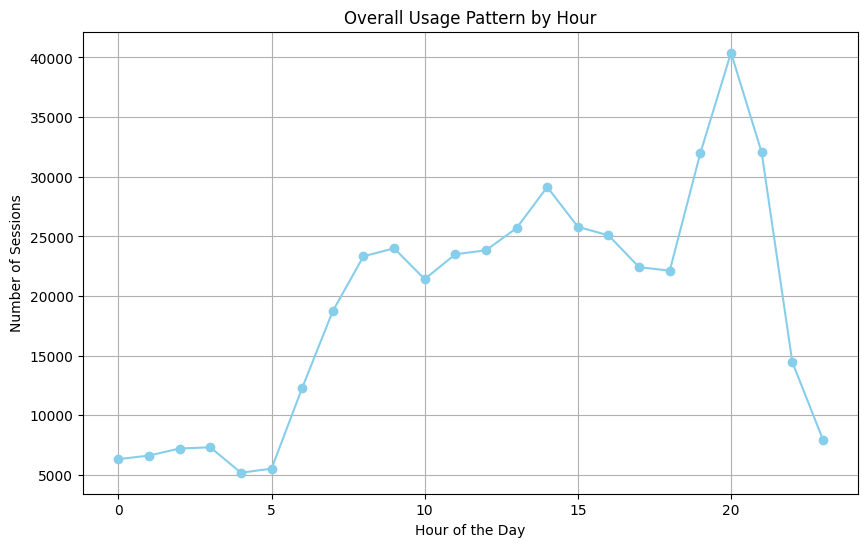

In [63]:
plt.figure(figsize=(10, 6))
overall_usage_by_hour.plot(kind='line', marker='o', color='skyblue')
plt.title('Overall Usage Pattern by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Sessions')
plt.grid(True)
plt.show()

Looks like the peak sessions are at night around 8 pm

## 3. Disparities in usage patterns across states, districts, and blocks.

In [64]:
### session count

In [65]:
groupDatabySDB = filtered_data.groupby(['state', 'district', 'block'])
# lets see disparity in number of sessions
usage_metrics = groupDatabySDB['SessionId'].count()

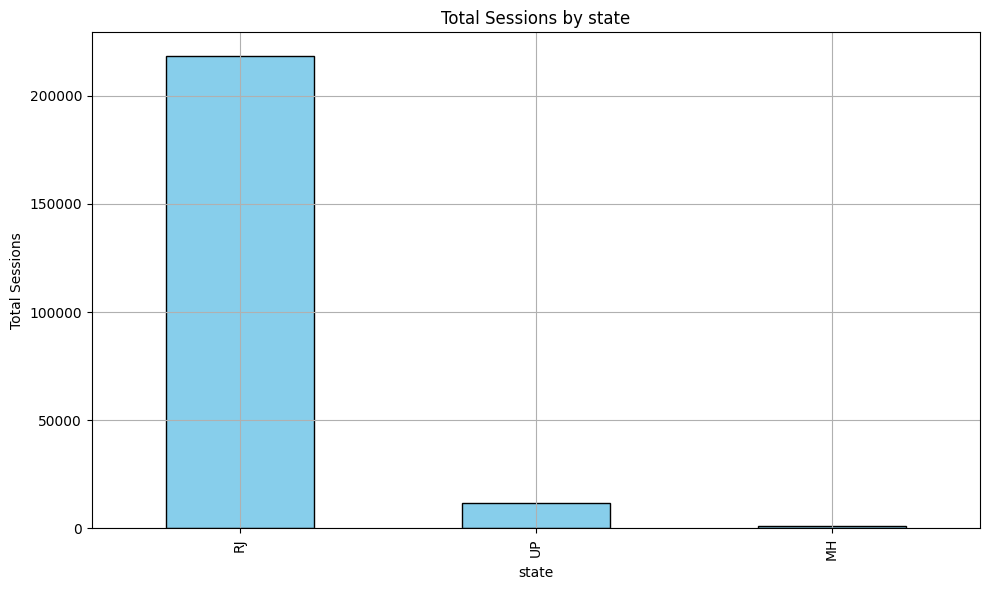

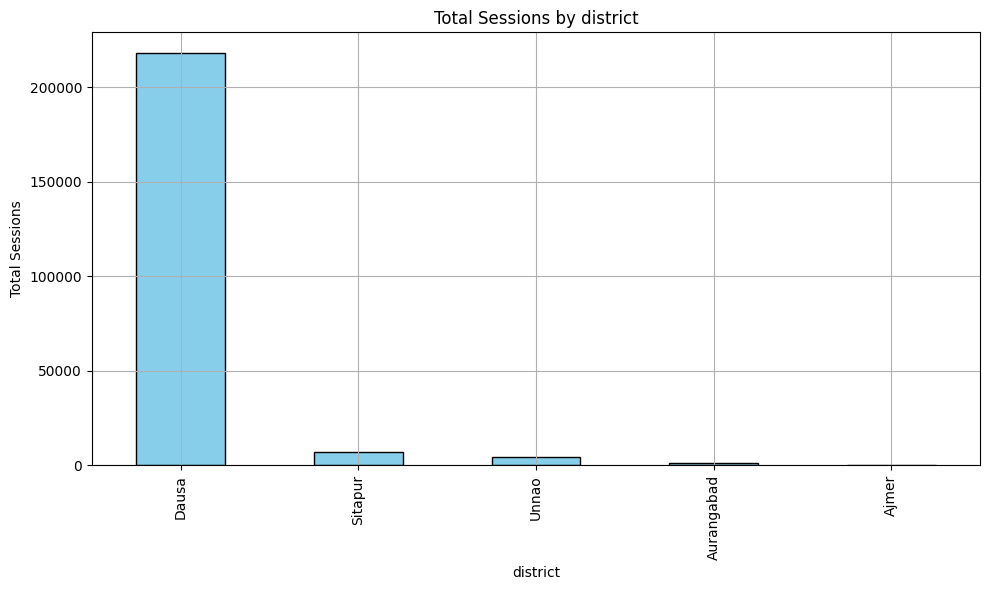

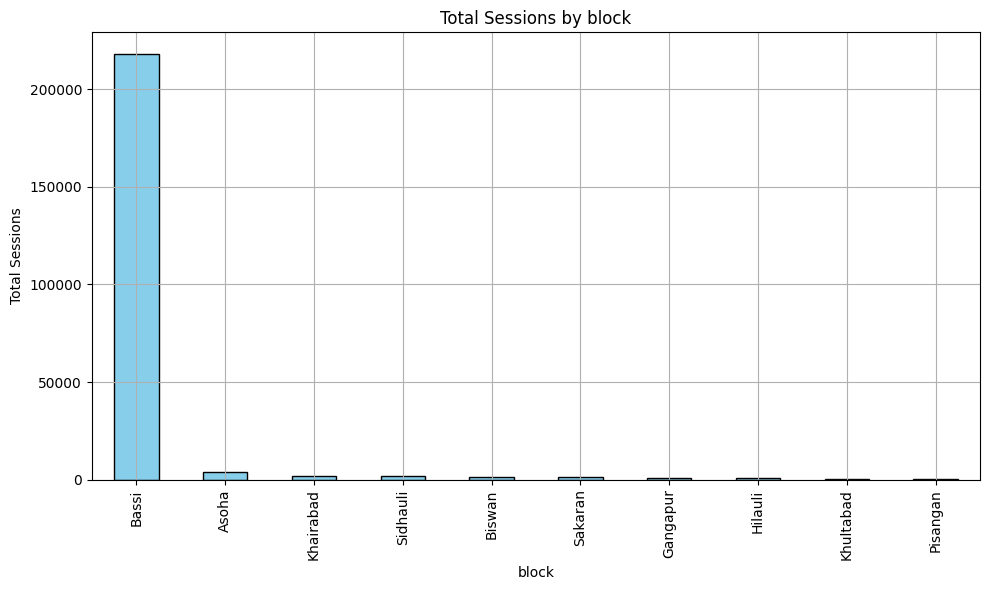

In [66]:
for level in ['state', 'district', 'block']:
    plt.figure(figsize=(10, 6))
    usage_metrics.groupby(level).sum().sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')

    plt.title(f'Total Sessions by {level}')
    plt.xlabel(level)
    plt.ylabel('Total Sessions')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

In [67]:
## mean session duration'

mean_session_duration = groupDatabySDB['sessionDurationSeconds'].mean()

mean_session_duration_sorted = mean_session_duration.sort_values(ascending=False)

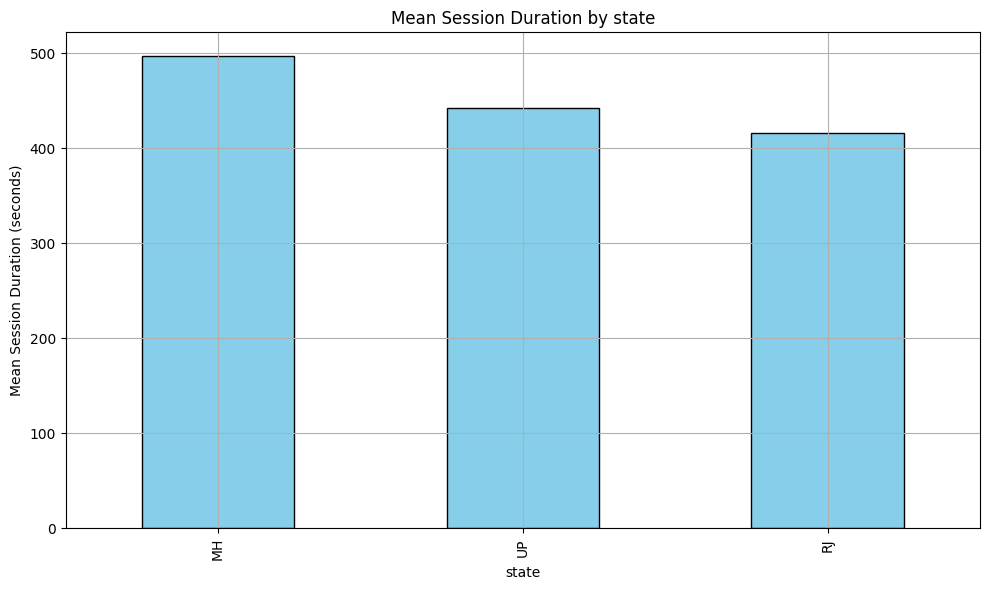

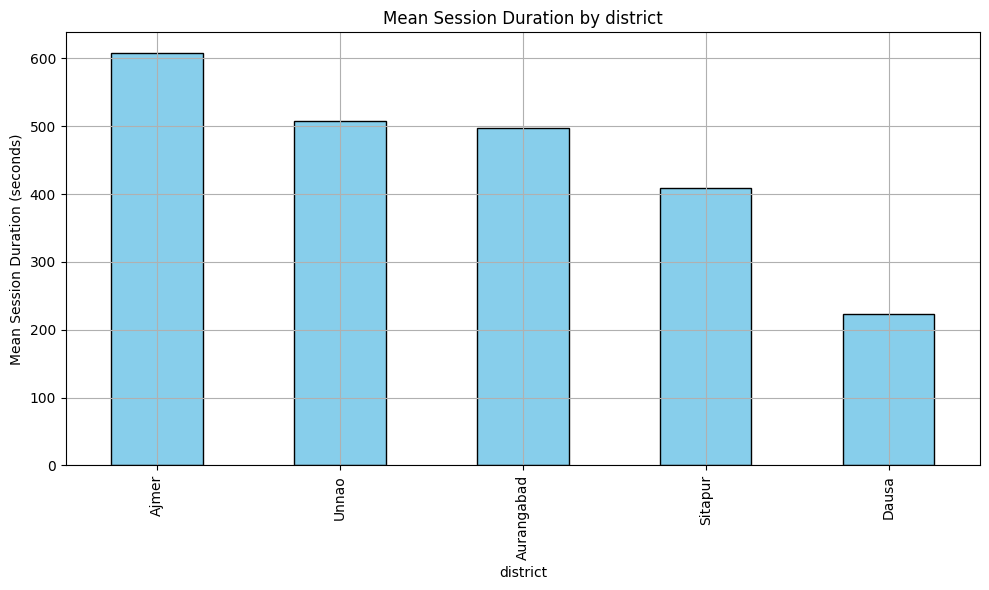

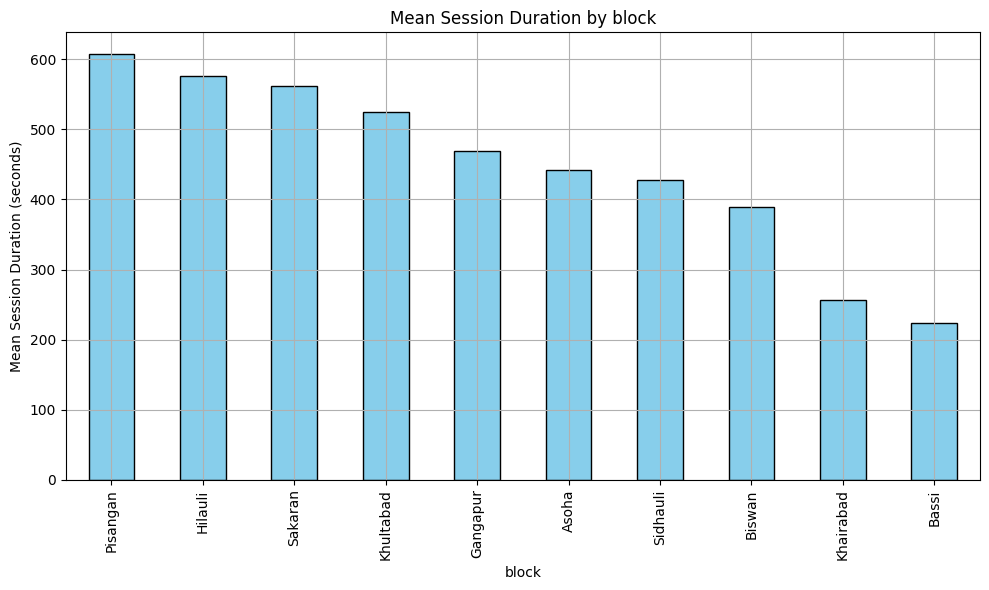

In [68]:
for level in ['state', 'district', 'block']:
    plt.figure(figsize=(10, 6))

    # Plot mean session duration by the current level of granularity, sorted in descending order
    mean_session_duration_sorted.groupby(level).mean().sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')

    # Set plot title and labels
    plt.title(f'Mean Session Duration by {level}')
    plt.xlabel(level)
    plt.ylabel('Mean Session Duration (seconds)')
    plt.grid(True)

    # Show plot
    plt.tight_layout()
    plt.show()

## 4. CORRELATION between Resource Type and mean session duration?

In [69]:
groupData = filtered_data2.groupby('resource_type')

# lets calculate the mean duration for each resource:
groupDataStats = groupData['sessionDurationSeconds'].mean()


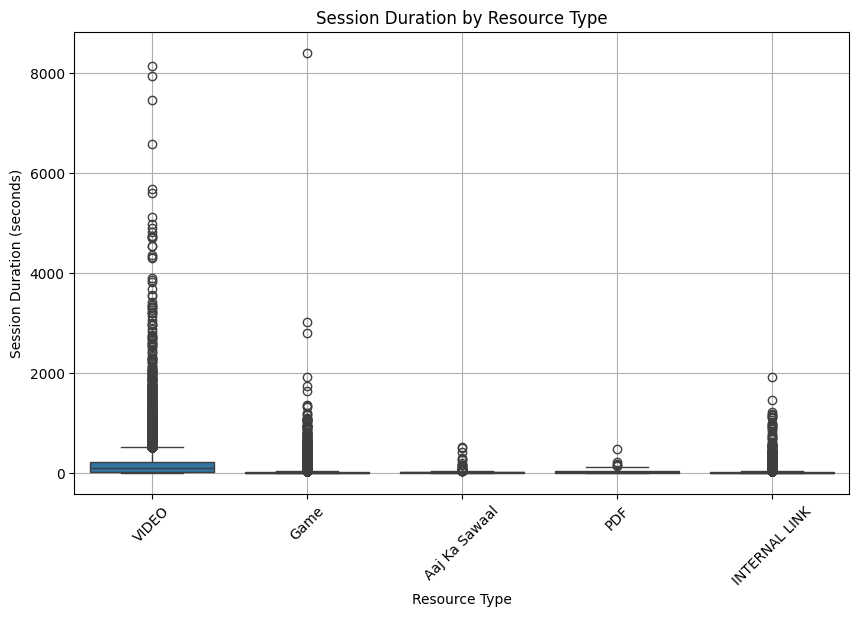

In [70]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='resource_type', y='sessionDurationSeconds', data=filtered_data)
plt.title('Session Duration by Resource Type')
plt.xlabel('Resource Type')
plt.ylabel('Session Duration (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

AAj ka sawal and pdf does have some smililarities because of possible overalp, video and game shows no correlation

The hypothesis can be verified using statistical tests: F-test

## 5. Analyze Difficulty level Distribution

In [71]:
## avergage time spent across different levels:

average_time_spent_per_level = filtered_data2.groupby('Level')['sessionDurationSeconds'].mean().sort_values(ascending=False)
average_time_spent_per_level

Level
0      142.197053
991     80.090909
4       26.380769
5       25.287293
2       25.229122
6       23.349372
99      20.563055
1       18.871522
990     12.025000
3        7.940094
14       5.517241
Name: sessionDurationSeconds, dtype: float64

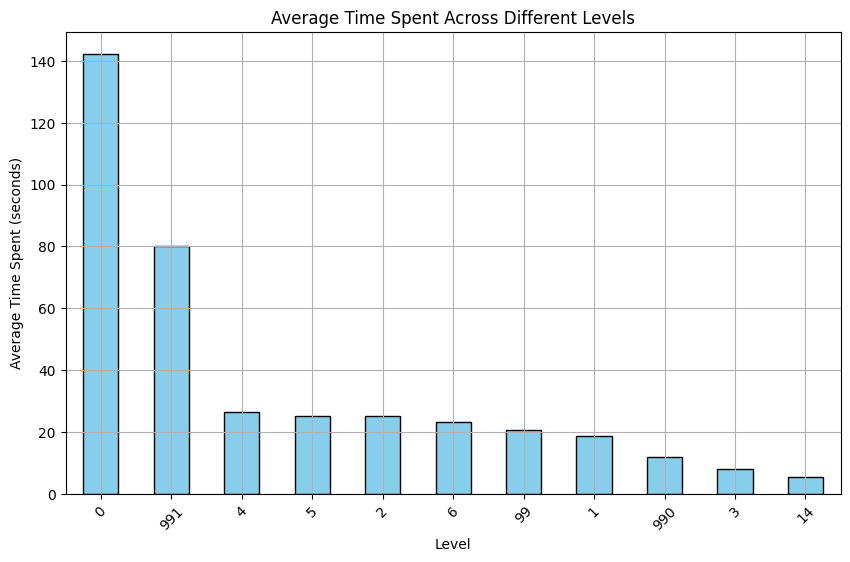

In [72]:
plt.figure(figsize=(10, 6))
average_time_spent_per_level.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Time Spent Across Different Levels')
plt.xlabel('Level')
plt.ylabel('Average Time Spent (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Average time spent in a session at level0 is interestingly high

In [73]:
filtered_data2.head(2)

,villageid,state,district,block,AutoId,SessionId,GroupId,ResourceId,DeviceId,Level,StartDateTime,EndDateTime,DateAdded,resource_type,SessionDuration,startYear,endYear,sessionDurationSeconds
0,1338,RJ,Dausa,Bassi,50891232,004f9938-54ae-4630-bb7c-3c0e6797e21a,GRP17118,3046,3db616a9b90a8f09,0,2018-03-31 16:40:48,2018-03-31 16:44:33,2018-05-11 15:40:04.580,VIDEO,0 days 00:03:45,2018,2018,225.0
1,1338,RJ,Dausa,Bassi,50891184,004f9938-54ae-4630-bb7c-3c0e6797e21a,GRP17118,3042,3db616a9b90a8f09,0,2018-03-31 16:40:48,2018-03-31 16:48:18,2018-05-11 15:40:04.580,VIDEO,0 days 00:07:30,2018,2018,450.0


## 6. Avg time spent across resource/content

In [74]:
average_session_duration_per_resource = filtered_data2.groupby('ResourceId')['sessionDurationSeconds'].mean()

In [75]:
top_5_average_session_duration = average_session_duration_per_resource.sort_values(ascending=False).head(5)

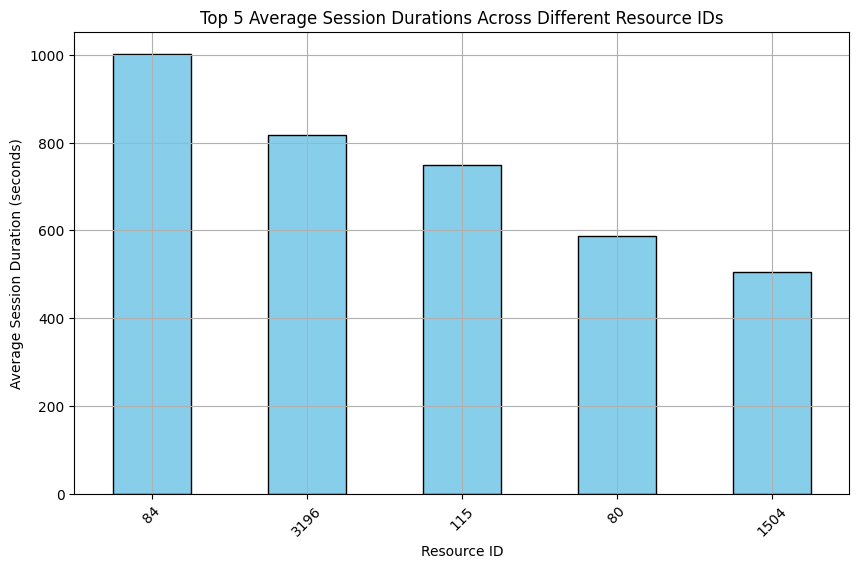

In [76]:
plt.figure(figsize=(10, 6))
top_5_average_session_duration.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 5 Average Session Durations Across Different Resource IDs')
plt.xlabel('Resource ID')
plt.ylabel('Average Session Duration (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Does that mean these resources are difficult? No, mostly the content is video content

In [77]:
filtered_data2[filtered_data2['ResourceId'].isin([84,3196,115,80,1504])]

,villageid,state,district,block,AutoId,SessionId,GroupId,ResourceId,DeviceId,Level,StartDateTime,EndDateTime,DateAdded,resource_type,SessionDuration,startYear,endYear,sessionDurationSeconds
2638,267,MH,Aurangabad,Khultabad,50917997,10c70cef-1f45-4447-a3d0-c8f9f663d3f1,GRP2695,1504,8a88947c62d3b184,0,2018-05-10 18:14:19,2018-05-10 18:18:21,2018-05-11 15:40:10.033,VIDEO,0 days 00:04:02,2018,2018,242.0
2707,267,MH,Aurangabad,Khultabad,50909910,10c70cef-1f45-4447-a3d0-c8f9f663d3f1,GRP2695,1504,8a88947c62d3b184,0,2018-05-10 18:03:20,2018-05-10 18:16:54,2018-05-11 15:40:10.033,VIDEO,0 days 00:13:34,2018,2018,814.0
3475,506,MH,Aurangabad,Khultabad,50913823,15d5067d-6aad-4617-843f-d7ae7f9a5bdb,GRP5553,80,38d146f6592c6699,0,2018-04-19 11:23:49,2018-04-19 11:35:34,2018-05-11 15:40:10.110,VIDEO,0 days 00:11:45,2018,2018,705.0
3476,506,MH,Aurangabad,Khultabad,50917710,15d5067d-6aad-4617-843f-d7ae7f9a5bdb,GRP5553,84,38d146f6592c6699,0,2018-04-19 11:23:49,2018-04-19 11:46:53,2018-05-11 15:40:10.110,VIDEO,0 days 00:23:04,2018,2018,1384.0
3555,506,MH,Aurangabad,Khultabad,50921045,15d5067d-6aad-4617-843f-d7ae7f9a5bdb,GRP5553,80,38d146f6592c6699,0,2018-04-19 11:20:34,2018-04-19 11:28:23,2018-05-11 15:40:10.110,VIDEO,0 days 00:07:49,2018,2018,469.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223481,1346,RJ,Dausa,Bassi,51106837,8facc21b-60eb-41bb-ae12-fff298ae652c,GRP17297,115,9f4877a0eb17d25b,0,2018-04-06 06:52:47,2018-04-06 06:55:33,2018-05-10 23:00:57.903,VIDEO,0 days 00:02:46,2018,2018,166.0
227136,1326,RJ,Dausa,Bassi,51111108,92f56502-d61f-4fd3-9e68-bf8b4ee2e441,GRP16783,3196,a9b9986379f082ca,0,2018-04-30 10:09:05,2018-04-30 10:09:07,2018-05-10 23:01:09.747,VIDEO,0 days 00:00:02,2018,2018,2.0
231724,1346,RJ,Dausa,Bassi,51089707,96d3b16d-9f70-4f65-a825-55f636998089,GRP17297,115,9f4877a0eb17d25b,0,2018-04-02 15:54:20,2018-04-02 16:04:43,2018-05-10 23:00:57.903,VIDEO,0 days 00:10:23,2018,2018,623.0
237998,1346,RJ,Dausa,Bassi,51246657,9c0d2fce-acef-4cf0-bf88-10b403a135a0,GRP17297,115,9f4877a0eb17d25b,0,2018-04-12 06:56:21,2018-04-12 07:06:44,2018-05-10 23:00:57.903,VIDEO,0 days 00:10:23,2018,2018,623.0


In [80]:
filtered_data['state'] = filtered_data['state'].replace({'MH': 'Maharashtra', 'UP': 'Uttar Pradesh', 'RJ': 'Rajasthan'})

<ipython-input-80-fb86d9d4d6e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['state'] = filtered_data['state'].replace({'MH': 'Maharashtra', 'UP': 'Uttar Pradesh', 'RJ': 'Rajasthan'})


In [86]:
filtered_data

,villageid,state,district,block,AutoId,SessionId,GroupId,ResourceId,DeviceId,Level,StartDateTime,EndDateTime,DateAdded,resource_type,SessionDuration,startYear,endYear,sessionDurationSeconds,startHour,endHour
0,1338,Rajasthan,Dausa,Bassi,50891232,004f9938-54ae-4630-bb7c-3c0e6797e21a,GRP17118,3046,3db616a9b90a8f09,0,2018-03-31 16:40:48,2018-03-31 16:44:33,2018-05-11 15:40:04.580,VIDEO,0 days 00:03:45,2018,2018,225.0,16,16
1,1338,Rajasthan,Dausa,Bassi,50891184,004f9938-54ae-4630-bb7c-3c0e6797e21a,GRP17118,3042,3db616a9b90a8f09,0,2018-03-31 16:40:48,2018-03-31 16:48:18,2018-05-11 15:40:04.580,VIDEO,0 days 00:07:30,2018,2018,450.0,16,16
2,1365,Rajasthan,Dausa,Bassi,50891295,00630537-3a99-4908-bd78-149d0b6b6128,GRP17591,SessionTracking,4fbb1b204bda36dc,0,2018-04-22 09:36:33,2018-04-22 09:49:01,2018-05-11 15:40:08.870,NaN,0 days 00:12:28,2018,2018,748.0,9,9
3,1365,Rajasthan,Dausa,Bassi,50891216,00630537-3a99-4908-bd78-149d0b6b6128,GRP17591,SessionTracking,4fbb1b204bda36dc,0,2018-04-22 09:36:33,2018-04-22 10:04:41,2018-05-11 15:40:08.870,NaN,0 days 00:28:08,2018,2018,1688.0,9,10
4,1365,Rajasthan,Dausa,Bassi,50891141,00630537-3a99-4908-bd78-149d0b6b6128,GRP17591,SessionTracking,4fbb1b204bda36dc,0,2018-04-22 09:36:33,2018-04-22 10:05:40,2018-05-11 15:40:08.870,NaN,0 days 00:29:07,2018,2018,1747.0,9,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238218,1312,Rajasthan,Dausa,Bassi,51122239,9c471e1c-5fda-493a-b35a-842a00b982f9,GRP16543,5500,87cb8672a3652152,1,2015-01-21 22:34:58,2015-01-21 22:34:59,2018-05-10 23:00:30.013,INTERNAL LINK,0 days 00:00:01,2015,2015,1.0,22,22
238219,1331,Rajasthan,Dausa,Bassi,51121947,9c4cea60-50a8-4b34-b01a-cf8441b262f9,GRP16937,3528,6bd5c09371a6429b,1,2018-04-12 20:41:06,2018-04-12 20:42:43,2018-05-10 23:00:33.293,INTERNAL LINK,0 days 00:01:37,2018,2018,97.0,20,20
238220,1317,Rajasthan,Dausa,Bassi,51126889,9c51d599-b2e8-47d9-8b75-564fab117229,GRP16635,1409,f05ded858a4abd52,1,2018-04-21 09:01:17,2018-04-21 09:01:30,2018-05-10 23:00:48.130,INTERNAL LINK,0 days 00:00:13,2018,2018,13.0,9,9
238221,1317,Rajasthan,Dausa,Bassi,51246665,9c51d599-b2e8-47d9-8b75-564fab117229,GRP16635,1409,f05ded858a4abd52,1,2018-04-21 09:01:48,2018-04-21 09:02:09,2018-05-10 23:00:48.130,INTERNAL LINK,0 days 00:00:21,2018,2018,21.0,9,9
